In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
import os

Using TensorFlow backend.


In [3]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
cd gdrive/My Drive/Colab Notebooks/models

[Errno 2] No such file or directory: 'gdrive/My Drive/Colab Notebooks/models'
/content


In [0]:
# Hyper parameter 
batch_size = 16
num_classes = 10
epochs = 25

In [0]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
print('x_train shape:', x_train.shape)
# x_train.shape -> (50000, 32, 32, 3)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
# 1. y_train -> to_categorical -> categorical dataset -> Loss: categorical_crossentropy
# Last dense layer: 10

# 2. y_train -> Loss: sparse_categorical_crossentropy
# Last dense layer:10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
# One-hot-encoding
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [12]:
print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zca_epsilon=1e-06,  # epsilon for ZCA whitening
    rotation_range=60,  # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.3,
    shear_range=0.,  # set range for random shear
    zoom_range=1.5,  # set range for random zoom
    channel_shift_range=0.,  # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0.,  # value used for fill_mode = "constant"
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True,  # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

Using real-time data augmentation.


In [0]:
filepath = "./cifar10-model-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
                                                   #

네트워크를 직접 설계해 보세요!

In [0]:
# for example,
n_kernels = 32
model = Sequential()

model.add(Conv2D(n_kernels, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'valid', input_shape = (32, 32, 3)))

model.add(Conv2D(n_kernels*2, (5, 5), activation='relu', kernel_initializer='he_normal', padding='valid'))

model.add(Conv2D(n_kernels*4, (7, 7), activation='relu', kernel_initializer='he_normal', padding='valid'))

model.add(BatchNormalization())
model.add(MaxPooling2D())




model.add(Conv2D(n_kernels*4, (3, 3), activation='relu', kernel_initializer='he_normal', padding='SAME'))

model.add(Conv2D(n_kernels*8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='SAME'))

model.add(BatchNormalization())
model.add(MaxPooling2D())


model.add(Conv2D(n_kernels*16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='valid'))

model.add(BatchNormalization())


model.add(GlobalAveragePooling2D())

model.add(Dense(10, activation='softmax', kernel_initializer='glorot_uniform'))


In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 26, 26, 64)        51264     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 20, 20, 128)       401536    
_________________________________________________________________
batch_normalization_10 (Batc (None, 20, 20, 128)       512       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 10, 10, 128)       147584    
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 256)      

In [0]:
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
#adam을 시도해 보았으나 오차값이 떨어지는 비율이 미미함

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [37]:
# Let's train the model using RMSprop
history = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4, callbacks=[checkpoint])

Epoch 1/25
3125/3125 [==============================] - 67s 22ms/step - loss: 1.9384 - accuracy: 0.2877 - val_loss: 1.7109 - val_accuracy: 0.3834

Epoch 00001: val_accuracy improved from 0.37310 to 0.38340, saving model to ./cifar10-model-01-0.38.hdf5
Epoch 2/25
3125/3125 [==============================] - 67s 21ms/step - loss: 1.8916 - accuracy: 0.3103 - val_loss: 1.6947 - val_accuracy: 0.3936

Epoch 00002: val_accuracy improved from 0.38340 to 0.39360, saving model to ./cifar10-model-02-0.39.hdf5
Epoch 3/25
3125/3125 [==============================] - 66s 21ms/step - loss: 1.8668 - accuracy: 0.3195 - val_loss: 1.6802 - val_accuracy: 0.3997

Epoch 00003: val_accuracy improved from 0.39360 to 0.39970, saving model to ./cifar10-model-03-0.40.hdf5
Epoch 4/25
3125/3125 [==============================] - 66s 21ms/step - loss: 1.8400 - accuracy: 0.3337 - val_loss: 1.6512 - val_accuracy: 0.4081

Epoch 00004: val_accuracy improved from 0.39970 to 0.40810, saving model to ./cifar10-model-04-0.

In [0]:
epochs_range = range(25)
validation_accuracy = history.history['val_accuracy']
training_accuracy = history.history['accuracy']

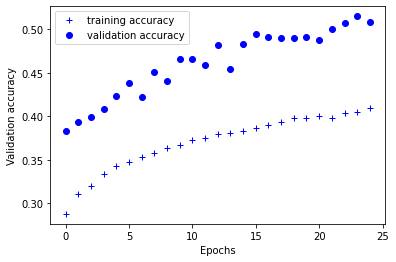

In [39]:
import matplotlib.pyplot as plt

plt.plot(epochs_range, training_accuracy, 'b+', label='training accuracy')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs_range, validation_accuracy, 'bo', label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
plt.legend()

plt.show()

In [40]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 166us/step
Test loss: 1.385917218017578
Test accuracy: 0.5087000131607056
